In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [7]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dir  = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2   
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [13]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# ---- Step 6: Early Stopping ----
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ---- Step 7: Train ----
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[es],
    verbose=2
)


Epoch 1/5
131/131 - 71s - 540ms/step - accuracy: 0.7352 - loss: 0.5786 - val_accuracy: 0.7430 - val_loss: 0.6504
Epoch 2/5
131/131 - 62s - 472ms/step - accuracy: 0.7448 - loss: 0.5338 - val_accuracy: 0.7440 - val_loss: 0.5816
Epoch 3/5
131/131 - 63s - 477ms/step - accuracy: 0.7738 - loss: 0.4793 - val_accuracy: 0.8044 - val_loss: 0.5319
Epoch 4/5
131/131 - 62s - 474ms/step - accuracy: 0.8064 - loss: 0.4322 - val_accuracy: 0.8303 - val_loss: 0.5079
Epoch 5/5
131/131 - 62s - 472ms/step - accuracy: 0.8253 - loss: 0.3908 - val_accuracy: 0.7555 - val_loss: 0.5499


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.7804 - loss: 0.5703

 Final Test Accuracy (after best epoch): 78.37%


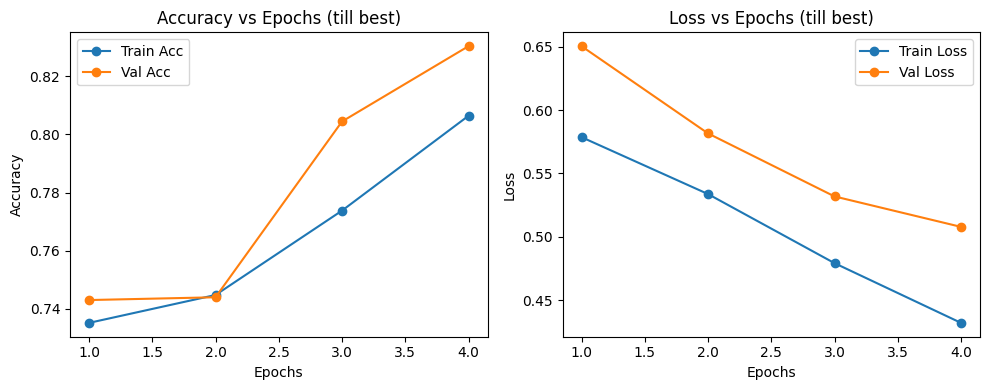

In [16]:
use_epochs = 4 

# Trim history data to first 4 epochs
train_acc = history.history['accuracy'][:use_epochs]
val_acc = history.history['val_accuracy'][:use_epochs]
train_loss = history.history['loss'][:use_epochs]
val_loss = history.history['val_loss'][:use_epochs]

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n Final Test Accuracy (after best epoch): {test_acc*100:.2f}%")

# Plot training history up to epoch 4
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, use_epochs+1), train_acc, marker='o', label='Train Acc')
plt.plot(range(1, use_epochs+1), val_acc, marker='o', label='Val Acc')
plt.title('Accuracy vs Epochs (till best)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, use_epochs+1), train_loss, marker='o', label='Train Loss')
plt.plot(range(1, use_epochs+1), val_loss, marker='o', label='Val Loss')
plt.title('Loss vs Epochs (till best)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()